# How to Use this Notebook
___

This notebook is meant to provide both a template for writing your own notebooks and examples of how the template can be applied using a dataset from the NOAA's Global Historical Climatology Network (GHCN) to investigate climate change. While there is no set recipe of how data science is done or shown in a Jupyter notebook, this notebook highlights some fundamental tasks when working with data and the general order in which they are often performed:
- Importing
- Cleaning
- Exploring
- Analyzing

### The Templates

In each use case, a template is given that shows the structure of the code with placeholders shown as `<missing_code>`. For example, if you come across `<variable_name>` or `<input_value>`, it suggests that you should replace it with an appropriate variable name or input value relevant to your specific use case. This is a common practice when writing code for illustrative purposes. While these placeholders are not valid Python syntax, they serve as a visual cue to indicate the section that requires user customization.

Sometimes, the angle brackets `< >` are not needed when it is obvious that generic code is being used. This is most often the case when assigning variables. This makes the template less cluttered and easier to interpret. For example, the following cell uses angle brackets to call out the `file_path`, but brackets are not needed to identify the variable where the data is stored, `dataframe_name`. 

`dataframe_name = pd.read_csv('<file_path>')`

### The Examples

When there are large sections of missing code, comments are often use to describe what is to be added.
Following each template, working code is provided that replaces the `<missing_code>` with code that works for the GHCN data.

# Importing
___

### Importing the Libraries

There are over 200,000 Python libraries available. The type of data and what you will do with it determine which libraries you need. However, there are some popular libraries that are commonly used:

- NumPy: scientific computing
- Pandas: data analysis and manipulation
- Matplotlib: visualizations
- SciPy: more scientific computing

The necessary libraries are often imported at the beginning of the notebook and are "imported as" using an abbreviation. The abbreviation allows us to use the library with less code. You can choose whatever abbreviation you want, but most libraries have a commonly accepted one. However, they don't have to be abbreviated (as is often the case with SciPy).

Notice that a special version of matplotlib called `pyplot` is often used. Pyplot makes using matplotlob easier in Jupyter notebooks. 

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None   # This turns off an annoying warning
import matplotlib.pyplot as plt
import scipy

### Importing the Data

Datasets may be stored "locally" on your computer or "in the cloud" on a server in a variety of file formats. Comma separated values (.csv) is the most common format.

The data must be brought into the computer's memory and stored in a variable. Pandas has a function called `read_csv` that converts a .csv file into a Pandas dataframe:

In [3]:
dataframe_name = pd.read_csv('<dataset_location>')

FileNotFoundError: [Errno 2] No such file or directory: '<dataset_location>'

The `dataset_location` can be a location on your computer, called a "file path", or a web address (url). In this notebook, we are running Jupyter on a remote server. In other words, it's like we have our own computer that exists in the cloud. This allows us to use a computer that probably has a lot more memory and computing power than the laptop or chromebook that you may be using now.  

Writing the correct file path for your .csv file can be difficult. The best place to start is to determine the "present working directory" of this Jupyter notebook. This is the file path of the folder that our notebook "lives" in. We use something called a "magic command" to do this:

In [ ]:
%pwd

You can decipher this by looking at the file browser pane to the left. This notebook, `Code_Templates.ipynb` sits in the file path given by `%pwd`. You will notice there is a folder called `Datasets`. If we want to tell Pandas the location of the data, all we need to do is insert the file name of the .csv file into the following. Notice that we don't have to provide the full file path because our present working directory already takes us to the `content` folder.

In [ ]:
dataframe_name = pd.read_csv('<dataset folder name>/<csv file name>')

If you double-click the `Datasets` folder, you will see the available .csv files.
___

#### Example

Let’s start exploring weather data! Within this notebook, you will learn how to work with the GHCNd dataset. The Global Historical Climatology Network daily (GHCNd) is an integrated database of daily climate summaries from land surface stations across the globe, including Chicago.

Read in the `midway.csv` file into a variable called `midway`

In [4]:
midway = pd.read_csv('Datasets/midway.csv')
midway

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-02-29,0.0,3.9,-2.8
1,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-01,0.0,2.2,-6.7
2,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-02,0.0,5.6,-3.9
3,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-03,0.0,2.8,-9.4
4,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-04,0.0,5.0,-8.9
...,...,...,...,...,...,...
33412,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2023-06-13,NaN,19.4,13.3
33413,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2023-06-14,0.0,22.8,15.0
33414,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2023-06-15,0.0,28.3,12.2
33415,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2023-06-16,0.0,20.0,12.2



# Cleaning Data
___

Next we’re going to clean up the data. A raw dataset can be very messy. Data may be labeled strangely, formatted incorrectly or missing altogether. When we "clean" data, we are fixing these problems with the goal of creating a new dataset that is easier to work with.

## Renaming Columns

Sometimes the original column names are confusing. You can change them by setting a list of new column names to `data.columns`

In [5]:
dataframe_name.columns = ['column_1_name', 'column_2_name', ...]

NameError: name 'dataframe_name' is not defined

It is important to be consistent in how you name columns. Here are a few recommendations:

- Continue using `snake_case`. Capitalization in variable and column names is a detail that students often miss.
- Choose column names that are both short and descriptive. Students should immediately know what the name means.


In this dataset, the column names are in all caps which will be difficult to type. Also, we may be able to figure out what `PRCP`, `TMAX` and `TMIN` mean, but there is a good chance the student may not. Therefore, we can make the columns names a little easier to interpret and type.

Also, some of these column names could include the units. As can probably be inferred, the temperatures are in Celsius. However, `precip` is unclear. This is where the [documentation](https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) for the data source is important. In this case, precipitation is measured in millimeters (mm).

#### Example

Let's make the column names more intuitive and add the united to the measurements.

Rename `PRCP` as `precil_mm`, `TMAX` as `high_temp_C`, and `TMIN` as `low_temp_C`:

In [6]:
midway.columns = ['station', 'name', 'date', 'precip_mm', 'high_temp_C', 'low_temp_C']
midway.head()

,station,name,date,precip_mm,high_temp_C,low_temp_C
0,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-02-29,0.0,3.9,-2.8
1,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-01,0.0,2.2,-6.7
2,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-02,0.0,5.6,-3.9
3,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-03,0.0,2.8,-9.4
4,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-04,0.0,5.0,-8.9


## Converting to Datetime

Dates and time can be confusing when coding because the computer needs to use a specific data type to work with, called **datetime**. Datetime allows us to sort and select entries in the dataset and make plots (charts) showing how a variable changes with time. However, you cannot assume that just because data looks like a date, that the computer sees it that way.

It is often helpful to use Python's built-in `type` function to check the data type;

In [ ]:
type(<location_of_data>)

#### Example

In [7]:
type(midway.loc[0, 'date'])  # .loc[0, 'date'] tells the computer to only look at the first row of the 'date' column

str

To the computer, a string is simply a piece of text. It does not have any useful mathematical meaning. Fortunately, Pandas has a function called `to_datetime` that converts dates and times into the datetime data type. Notice below that we reference a column in a dataframe with the following syntax: `dataframe_name['column_name']`

In [8]:
midway['date'] = pd.to_datetime(midway['date']) # converts the entire 'date' column to datetime
midway.head()

,station,name,date,precip_mm,high_temp_C,low_temp_C
0,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-02-29,0.0,3.9,-2.8
1,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-01,0.0,2.2,-6.7
2,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-02,0.0,5.6,-3.9
3,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-03,0.0,2.8,-9.4
4,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",1928-03-04,0.0,5.0,-8.9


Notice the dates look the same. However, let's check the data type again.

In [9]:
type(midway.loc[0, 'date'])

pandas._libs.tslibs.timestamps.Timestamp

## Setting the Index

The **index** is how the data is ordered. In a dataframe, the index is the first column and is in bold. By default, the index starts at 0 and increases by whole numbers. However, when we work with data that has been measured by time, we will usually want time to be our index.

We can make one of our columns the index using the `set_index` function:

In [ ]:
dataframe_name = dataframe_name.set_index('<column that you want to become index>')

#### Example

Set the `date` column as the index:

In [10]:
midway = midway.set_index('date')
midway.head()

,station,name,precip_mm,high_temp_C,low_temp_C
date,,,,,
1928-02-29,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",0.0,3.9,-2.8
1928-03-01,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",0.0,2.2,-6.7
1928-03-02,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",0.0,5.6,-3.9
1928-03-03,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",0.0,2.8,-9.4
1928-03-04,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",0.0,5.0,-8.9


While a little tedious, changing the index to datetime is necessary for us to explore how the data changes with respect to time.

## Filtering Columns

Often, the original data contains more information than needed. Therefore, creating new dataframes that only contain the columns that will be used moving forward is a good idea.

In [ ]:
new_dataframe_name = old_dataframe_name[['new_column_1', 'new_column_2', ...]]

The double brackets, `[[`,  are confusing. If we were filtering just one column, we would use a single bracket, `[`. However, if you want to filter mutiple columns, you must pass a list inside the first set of brackets.

#### Example

Let's focus on just the high and low temperatures.

Create a new dataframe called `filtered_midway` that contains only the `high_temp_C` and `low_temp_C` columns:

In [11]:
filtered_midway = midway[['high_temp_C', 'low_temp_C']]
filtered_midway.head()

,high_temp_C,low_temp_C
date,,
1928-02-29,3.9,-2.8
1928-03-01,2.2,-6.7
1928-03-02,5.6,-3.9
1928-03-03,2.8,-9.4
1928-03-04,5.0,-8.9


Notice that we assigned this smaller dataset to a new variable, `filtered_midway`. This preserves the original dataframe in the `midway` variable so we can access it, if needed.

### Generating New Data
While the data may be in a much better state than what we started with, it is often necessary to create new data using the existing dataset for a variety of reasons. Perhaps the a outcome variabnle needs to be normalized or the units converted. 

These calculations are often written as **functions** that take one or more inputs (known as parameters) and output or "return" a value.

In [ ]:
def function_name(parameter_1, parameter_2, ...):
    # insert calculation here using the inputs as variables
    return output_variable

#### Example

While we often encourage students to use the metric system, their intuition of "hot" and "cold" temperature is based on the imperial system. Therefore, we can convert the temperatures to Fahrenheit. 

Because the Celsius to Fahrenheit calculation needs to be done many times, we can define a function.

Define a function called `cel_to_far` that takes an input, `temp_C` and returns `temp_F`:

In [12]:
def cel_to_fahr(temp_C):
    temp_F = (temp_C * 9/5) + 32 
    return temp_F

Defining the function doesn't appear to do anything, but we have actually taught the computer how to take an input, `temp_C`, and give us an output, `temp_F`.

In [13]:
cel_to_fahr(20)

68.0

Here is where Pandas is really powerful. If we want to convert all of our Celsius temperatures to Fahrenheit, we have to repeat the calculation over 33,000 times! Fortunately, we only need to tell the computer once by putting the column we want to convert into the function. 

In the following example, we are placing the output of the function into a new column called `high_temp_F`

In [14]:
filtered_midway['high_temp_F'] = cel_to_fahr(filtered_midway['high_temp_C'])
filtered_midway.head()

,high_temp_C,low_temp_C,high_temp_F
date,,,
1928-02-29,3.9,-2.8,39.02
1928-03-01,2.2,-6.7,35.96
1928-03-02,5.6,-3.9,42.08
1928-03-03,2.8,-9.4,37.04
1928-03-04,5.0,-8.9,41.00


**Try it yourself**: Make a new column called `low_temp_F` for low temps in Fahrenheit:

In [23]:
filtered_midway['low_temp_F'] = cel_to_fahr(filtered_midway['low_temp_C'])
filtered_midway.head()

,high_temp_C,low_temp_C,high_temp_F,low_temp_F
date,,,,
1928-02-29,3.9,-2.8,39.02,26.96
1928-03-01,2.2,-6.7,35.96,19.94
1928-03-02,5.6,-3.9,42.08,24.98
1928-03-03,2.8,-9.4,37.04,15.08
1928-03-04,5.0,-8.9,41.00,15.98


# Exploring the Data
___
The work of cleaning the data (often called "wrangling") usually takes up most of the data scientist's time. However, the investment of time in getting the data in a workable state makes the exploration of the data much easier. 

### Summarizing the Data

There are many methods to summarize and describe the data. We will just scratch the surface here, but will highlight some of the more common methods.

**Descriptive statistics** provide a summary of data. The most commonly known examples are measures of central tendency (mean, median and mode), maximum, minimum and standard deviation.

| Name | Function |
|-------|-------|
| minumum | `.min()` |
| maximum | `.max()` |
| mean | `.mean()` |
| median | `.median()` |
| mode | `.mode()` |
| standard deviation | `.std()` |


Applying these functions is simply a matter of calling the column you want to describe and following it with `.function()`

In [ ]:
dataframe_name['column_name'].<function>

#### Example

Suppose we wanted to determine the hottest temperature ever recorded at Midway airport. 

Use the appropriate function to calculate the maximum high temperature in Fahrenheit:

In [24]:
filtered_midway['high_temp_F'].max()

107.06

### Filtering Rows

There may be certain rows we are interested in as well. Rows are a little trickier to reference because they are not arrays. In columns, we can reference the name of the columns that we are interested in. Also, the elements (entries) in a column are the same data type. Since rows contain the elements of several different arrays, they can contain multiple data types and require a different way of thinking. We can filter rows two ways: by index or by label.

#### Filtering by Label

Sometimes, you will want only the rows that contain a certain value or range of values contained within a column. This is done by using **conditional** statements. The following operators are used:

| Name | Operator |
|-------|-------|
| equal to | `==` |
| not equal to | `!=` |
| greater than | `>` |
| greater than or equal to | `>=` |
| less than | `<` |
| less than or equal to | `<=` |



In [ ]:
new_dataframe = old_dataframe[(old_dataframe['column_name'] <operator> <value_or_label>)]

#### Example

Suppose we are interested in identifying the days where the temperature was 100 degrees F or higher.

Filter out the days where the temperature was greater than or equal to 100 degrees F and place it in a variable called `hund_deg_days`:

In [25]:
hund_deg_days = filtered_midway[(filtered_midway['high_temp_F'] >= 100)]
hund_deg_days

,high_temp_C,low_temp_C,high_temp_F,low_temp_F
date,,,,
1931-06-28,37.8,23.3,100.04,73.94
1931-06-30,38.3,24.4,100.94,75.92
1933-06-07,38.3,24.4,100.94,75.92
1933-06-10,38.3,21.1,100.94,69.98
1933-06-11,37.8,21.7,100.04,71.06
1933-06-20,37.8,17.2,100.04,62.96
1933-06-27,38.9,21.1,102.02,69.98
1934-05-31,38.9,14.4,102.02,57.92
1934-06-01,41.7,20.6,107.06,69.08


#### Fine Tuning

The conditional can be made more selective using the `&` (and) or `|` (or) operators:

In [ ]:
new_dataframe = old_dataframe[(old_dataframe['column_name'] <operator> <value_or_label>) & (old_dataframe['column_name'] <operator> <value_or_label>)]

#### Example

If we wanted to see days that were between 102 and 103 degrees, we can use the `&` (and) conditional:

In [26]:
days_102 = filtered_midway[(filtered_midway['high_temp_F'] >= 102) & (filtered_midway['high_temp_F'] <= 103)]
days_102

,high_temp_C,low_temp_C,high_temp_F,low_temp_F
date,,,,
1933-06-27,38.9,21.1,102.02,69.98
1934-05-31,38.9,14.4,102.02,57.92
1949-07-03,38.9,22.8,102.02,73.04
1953-06-19,38.9,22.2,102.02,71.96
1956-07-01,39.4,23.3,102.92,73.94
1988-06-20,39.4,25.0,102.92,77.00
1988-07-15,39.4,25.0,102.92,77.00
1991-07-22,38.9,25.6,102.02,78.08
1991-08-02,38.9,22.2,102.02,71.96


#### Filtering by Index

The advantage of making datetime our index is that we can filter a particular day or range of dates. There are many ways to do this, but here we will use an **attribute** of the datetime index. There are many attributes of the datetime index, such as `year`, `month` and `day`. There can all be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html).

In [ ]:
new_dataframe = old_dataframe[old_dataframe.index.<attribute> <operator> <value>]

#### Example

Remember back to our introduction to climate change and weather events. There was a news article from Block Club Chicago that noted March 4th 2019 was the coldest March 4th in 129 years! If March 4th 2019 was the coldest March 4th in 129 years, we are interested in one day in particular: March 4. In order to do this we will want only those rows for March 4. 

<img src = 'imgs/march_cold.png' width = 400>

First we can filter out the March dates:

In [27]:
march = filtered_midway[filtered_midway.index.month == 3]
march.head()

,high_temp_C,low_temp_C,high_temp_F,low_temp_F
date,,,,
1928-03-01,2.2,-6.7,35.96,19.94
1928-03-02,5.6,-3.9,42.08,24.98
1928-03-03,2.8,-9.4,37.04,15.08
1928-03-04,5.0,-8.9,41.00,15.98
1928-03-05,-2.2,-13.3,28.04,8.06


**Try it yourself**: Make a dataframe called `march_4` for all records for March 4:

In [28]:
march_4 = march[march.index.day == 4]
march.head()

,high_temp_C,low_temp_C,high_temp_F,low_temp_F
date,,,,
1928-03-01,2.2,-6.7,35.96,19.94
1928-03-02,5.6,-3.9,42.08,24.98
1928-03-03,2.8,-9.4,37.04,15.08
1928-03-04,5.0,-8.9,41.00,15.98
1928-03-05,-2.2,-13.3,28.04,8.06


## Visualizing the Data

While data in tables and the output of functions is one way of exploring the data, a more accessible way is the creation of visualizations. These allow us to easily see outliers and patterns in the data.

Visualizing is a whole new world of coding. A variety of visualizations are available: plots, histograms, and scatterplots, to name a few. Here we will make a simple **plot** (line graph) using the Matplotlib library. 

In [21]:
x_axis = dataframe_name.index.<attribute>
y_axis = dataframe_name['column_name']

plt.plot(x_axis, y_axis)
plt.xlabel('<x_axis_label>')
plt.ylabel('<y_axis_label>')
plt.title('<title>')
plt.show()

SyntaxError: invalid syntax (836103012.py, line 1)

#### Example

March 4th 2019 was the coldest March 4th in 129 years! Can we spot March 4th 2019 in our data?

Create a line plot of low temperatures for March 4 for every year in the data:

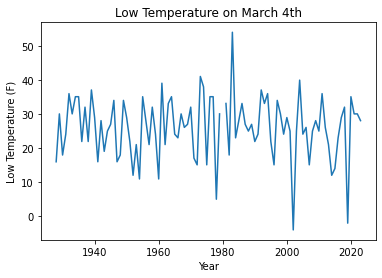

In [29]:
years = march_4.index.year
min_temps = march_4['low_temp_F']

# Plotting the data
plt.plot(years, min_temps)
plt.xlabel('Year')
plt.ylabel('Low Temperature (F)')
plt.title('Low Temperature on March 4th')
plt.show()

## Try it yourself:

“Remember back to our introduction to climate change and weather events. There was a news article from Block Club Chicago that noted April 13, 2023 was the hottest April 13th in 138 years! Can we spot April 13, 2023 in our data?”

<img src = 'imgs/april_hot.png' width = 400>

Starting with the midway.csv file, build your own notebook. Avoid the temptation to copy and paste cells. 


In [30]:
april = filtered_midway[filtered_midway.index.month == 4]
april_13 = april[april.index.day == 13]

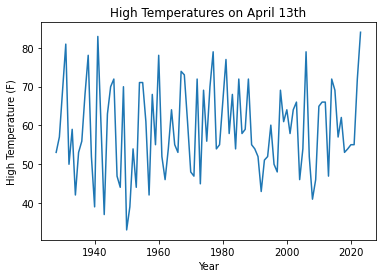

In [31]:
years = april_13.index.year
max_temps = april_13['high_temp_F']

# Plotting the data
plt.plot(years, max_temps)
plt.xlabel('Year')
plt.ylabel('High Temperature (F)')
plt.title('High Temperatures on April 13th')
plt.show()

The following sections are under construction :)

# Analyzing Data

Exploring the data through descriptive statistics and visualizations help us better understand the phenomenon and generate hypotheses, but we need more formal methods to test these hypotheses. This is where statistical methods become valuable.

There is a saying among meteorologists, "Averages are made up the extremes." In other words, we often compare individual events to the average, but the average is just a combination of individual events. 

In the above example, we have two examples of record-breaking temperatures. While we know that record temperatures are an extreme occurrence, measuring ***how*** extreme they are is important from a data science perspective.




We can also run a test to see if these record-breaking temperatures are statistically significant from the average temperature” 

## Scatterplots

### Best Fit Lines and R-values

# Hypothesis Testing

## Building Contingency Tables

## Histograms

## P-Values